# MATH 210 Introduction to Mathematical Computing

## March 21, 2022

* Order of accuracy
* Improved Euler's method

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Order of accuracy

Let $y'=f(t,y)$, $y(t_0)=y_0$. The local truncation error is

$$
E_{\mathrm{local}}(h) = | y(t_1) - y_1 |
$$

where $t_1 = t_0 + h$ and $y_1$ is an approximation by one step of a numerical method. We say that a numerical method has order $p$ if

$$
E_{\mathrm{local}}(h) \leq Ch^{p+1}
$$

for some constant $C$, for $h$ "small enough", and for any first order differential equation. (The number $C$ depends on the ODE.)

We've seen that Euler's method is order 1. And $C$ is related to the maximum value of $| y''(t) |$.

If a numerical method has order $p$, then for (almost) every differential equation $y'=f(t,y)$, $y(t_0)=y_0$, the local error is

$$
E_{\mathrm{local}}(h) \approx Ch^{p+1}
$$

for small $h$. Therefore the slope of the plot $\log(E)$ versus $\log(h)$ is $p+1$ since

$$
\log(E_{\mathrm{local}}) \approx (p+1) \log(h) + \log(C)
$$

## Improved Euler's method

Let $y' = f(t,y)$, $y(t_0)=y_0$. Use the degree 2 Taylor polynomial to approximate $y(t_1)$

$$
y(t_1) \approx y(t_0) + y'(t_0)(t_1 - t_0) + \frac{y''(t_0)}{2}(t_1 - t_0)^2
$$

Use forward difference formula to approximate $y''(t_0)$

$$
y''(t_0) \approx \frac{y'(t_1) - y'(t_0)}{t_1 - t_0}
$$

Put these together

\begin{align*}
y(t_1) &\approx y(t_0) + y'(t_0)(t_1 - t_0) + \frac{y'(t_1) - y'(t_0)}{2(t_1 - t_0)}(t_1 - t_0)^2 \\
&\approx y(t_0) + \frac{y'(t_1) + y'(t_0)}{2}(t_1 - t_0)
\end{align*}

Finally, use Euler's method to approximate $y_1$ to plug in to $y'(t_1) \approx f(t_1,y_1)$.

The improved Euler's method (or Heun's method) is:

\begin{align*}
h &= t_{n+1} - t_n \\
k_1 &= f(t_n,y_n) \\
k_2 &= f(t_n + h,y_n + k_1 h) \\
y_{n+1} &= y_n + \frac{k_1 + k_2}{2}h
\end{align*}

In [2]:
def odeIEuler(f,t,y0):
    y = np.zeros(len(t))
    y[0] = y0
    for n in range(0,len(t)-1):
        h = t[n+1] - t[n]
        k1 = f(t[n],y[n])
        k2 = f(t[n+1],y[n] + k1*h)
        y[n+1] = y[n] + (k1 + k2)/2*h
    return y

Test our function on an ODE where we know the exact answer. For example, $y'=-y$, $y(0)=1$ the exact solution is $y(t)=e^{-t}$.

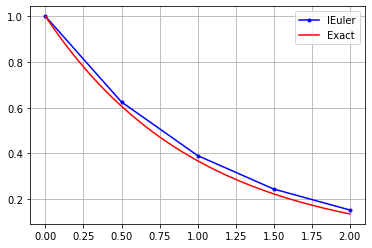

In [4]:
f = lambda t,y: -y; t = np.linspace(0,2,5); y0 = 1;
y = odeIEuler(f,t,y0)
t_exact = np.linspace(0,2,100)
y_exact = np.exp(-t_exact)
plt.plot(t,y,'b.-',t_exact,y_exact,'r')
plt.legend(['IEuler','Exact']), plt.grid(True)
plt.show()

Let's verify the order of accuracy. Compute the error on one step applied to $y'=y$, $y(0)=1$ for different step sizes and plot $\log(E)$ versus $\log(h)$.

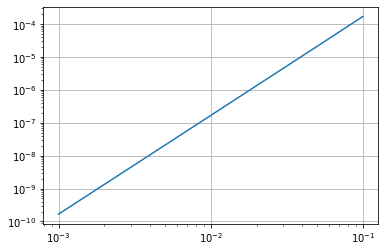

In [5]:
f = lambda t,y: y
y0 = 1;
hs = [0.1,0.05,0.01,0.005,0.001]
E = np.zeros(len(hs))
for n in range(0,len(hs)):
    h = hs[n]
    y = odeIEuler(f,[0,h],y0)
    y1 = y[1]
    y1_exact = np.exp(h)
    E[n] = np.abs(y1_exact - y1)
plt.loglog(hs,E), plt.grid(True)
plt.show()

The plot has slope 3 which confirms the improved Euler's method is order 2.

Consider $y'=y \cos(t)$, $y(0)=1$. The exact solution is $y(t) = e^{\sin(t)}$.

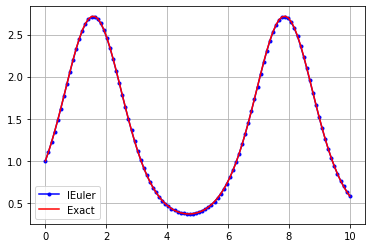

In [6]:
f = lambda t,y: y*np.cos(t)
t = np.linspace(0,10,100);
y0 = 1;
y = odeIEuler(f,t,y0)
t_exact = np.linspace(0,10,100)
y_exact = np.exp(np.sin(t_exact))
plt.plot(t,y,'b.-',t_exact,y_exact,'r')
plt.legend(['IEuler','Exact']), plt.grid(True)
plt.show()